<a href="https://colab.research.google.com/github/behzcd/Data-Science-and-AI/blob/main/05_ML_15_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

# Clustering

Klasterlash unsupervised learningning bir ko'rinishi hisoblanadi. 

Klasterlash yordamida yorliqlanmagan (label yo'q) ma'lumotlarni klasterlarga ajratamiz.

Klasterdagi boshqa obyektlarga o'xshash va boshqa klasterlardagi obyektlarga o'xshamaydigan obyektlar guruhi.

**Klasterlash qayerda ishlatiladi?**
- SAVDO VA MARKETING
    - Mijozalr xarid odatlarini aniqlash
    - Tavsiya tizimlari 
- BANK VA MOLIYA
    - Firibgarlikni aniqlash
    - Customer churn
- SUG’URTA
    - Firibgarlikni aniqlash
    - Mijozlarning riskini baholash
- NASHRIYOT
    - Yangiliklarni mavzu bo’yicha saralash
    - Tavsiya tizimlari 
- TIBBIYOT
    - Kasallarning odatlarini aniqlash
- BIOLOGIYA
    - Genetik markerlarni tahlil qilish orqali qarindoshlikni aniqlash
    
## Amaliyot
Ushbu amaliyotda biz tasodifiy nuqtalar yaratamiz va bu nuqtalarni klasterlaymiz. Maqsad: klasterlash algoritmi qanday ishlashini ko'rish:

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

Tasodifiy nuqtalar klasterini yaratish uchun `make_blobs` funksiyasidan foydalanamiz. Bu funksiya quyidagi parametrlarni qabul qiladi:
- `n_samples` - nuqtalar soni
- `centers` - klasterlar markazi (sentroid) koordinatalari
-`cluster_std` - markazdan standart og'ish

`make_blobs` funksiyasi nuqtalarning `x` va `y` koordinatalarini qaytaradi.

In [2]:
np.random.seed(0)
centroids = [[3,3], [-3, -2], [2, -3], [0, 0]]
X, y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

Nuqtalarni chizamiz:

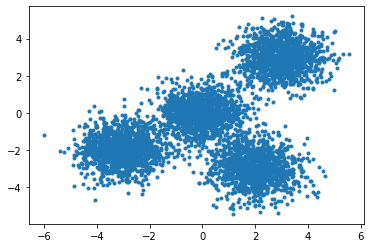

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

### k-means algoritmi
`KMeans` funksiyasi quyidagi parametrlarni qabul qiladi:
- `init` - sentrodilarni tanlash usuli (`k-means++` yoki `random`)
- `n_clusters` - klastertlar soni
- `n_init` - algoritmni necha marta ishga tushirish (turli sentroidlar bilan qayta-qayta ishga tushirib, modelni qurishni boshlash uchun eng yaxshi sentroidlar tanlanadi)

`KMeans` boshqa parametrlari haqida rasmiy sahifasidan ma'lumot olasiz: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [4]:
k_means = KMeans(init = "random", n_clusters = 4, n_init = 15)

Modelni tarbiyalaymiz

In [5]:
k_means.fit(X)

KMeans(init='random', n_clusters=4, n_init=15)

Nuqtalar klasterlandi. Klaster raqamini ko'rish uchun `.labels_` parametriga murojaat qilamiz.

In [6]:
k_means.labels_

array([1, 0, 0, ..., 3, 1, 1], dtype=int32)

Klaster markazlarini ko'rich uchun `.cluster_centers_` parametriga murojaat qilamiz.

In [7]:
k_means.cluster_centers_

array([[ 1.99348887e+00, -3.01067931e+00],
       [-3.01979724e+00, -1.99489798e+00],
       [-3.05006801e-02,  1.12353254e-03],
       [ 2.97795387e+00,  2.99317691e+00]])

Algoritm topgan klaster markazlarini, biz avvaldan bergan markazlar bilan solishtiramiz:

In [8]:
print(centroids)

[[3, 3], [-3, -2], [2, -3], [0, 0]]


Deyarli bir xil. Butunlab ko'ramiz:

In [9]:
print(np.round(k_means.cluster_centers_))

[[ 2. -3.]
 [-3. -2.]
 [-0.  0.]
 [ 3.  3.]]


### Grafik chizamiz

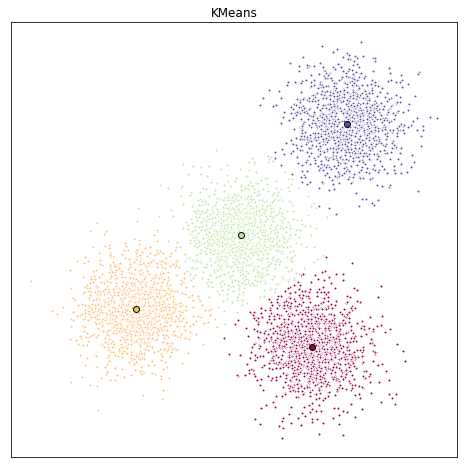

In [10]:
fig = plt.figure(figsize=(8, 8))
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

## VAZIFA
`KMeans` algoritmini turli `k` (klasterlar soni) va boshqa `init` parametri (`k-means++`) bilan ishga tushirib ko'ring.

In [11]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 15)

In [12]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=15)

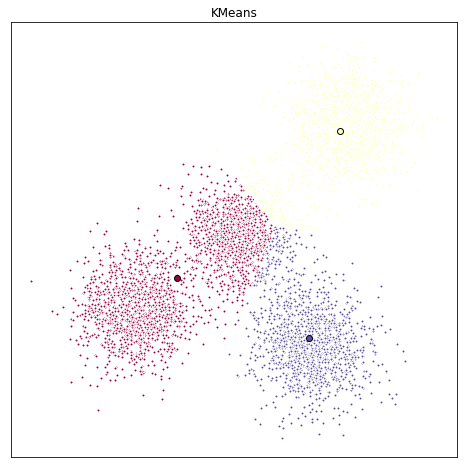

In [13]:
fig = plt.figure(figsize=(8, 8))
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

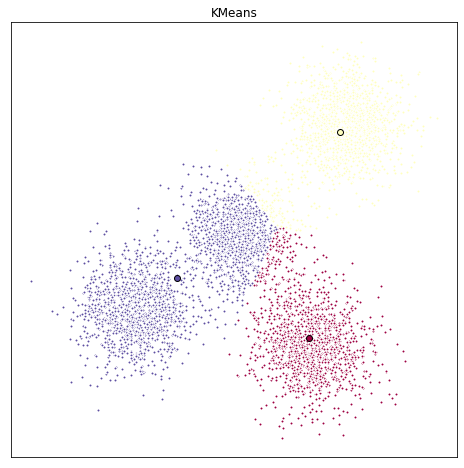

In [ ]:
# Kutilgan natija